<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import sklearn as sk


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples = 1000)

In [22]:
data = pd.DataFrame(data = {'variable1' : X[:,0], 'variable2': X[:,1], 'label': y})

In [23]:
data

,variable1,variable2,label
0,0.990461,-0.137790,0
1,-0.248690,-0.968583,0
2,0.723862,-0.340623,1
3,0.394182,-0.696147,1
4,-0.799937,-0.010053,1
...,...,...,...
995,-0.947098,-0.320944,0
996,-0.587785,0.809017,0
997,-0.037690,0.999289,0
998,-0.208673,0.772305,1


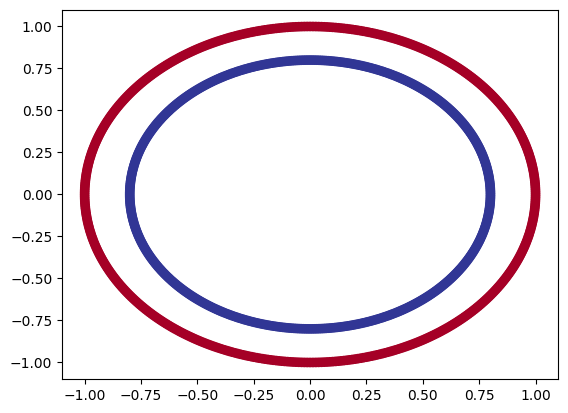

In [24]:
plt.scatter(data['variable1'],data['variable2'],c = y,cmap=plt.cm.RdYlBu)

In [25]:
y_tes = data['label']

In [26]:
import torch
y_tes = y_tes.to_numpy()

In [27]:
y_tes = torch.from_numpy(y_tes)

In [28]:
data = data.drop('label',axis = 1)

In [29]:
X_tes = data.to_numpy()

In [30]:
X_tes = torch.from_numpy(X_tes)

In [31]:
X_tes.shape

torch.Size([1000, 2])

In [46]:
X_tes = torch.tensor(X_tes, dtype = torch.float32)
y_tes = torch.tensor(y_tes,dtype = torch.float32)

<ipython-input-46-d48ba99c0cde>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tes = torch.tensor(X_tes, dtype = torch.float32)
<ipython-input-46-d48ba99c0cde>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tes = torch.tensor(y_tes,dtype = torch.float32)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tes, y_tes)


# **Build a Pytorch Model**

In [33]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [34]:
import torch.nn as nn

In [35]:
class MakeCircles(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 8)
    self.layer2 = nn.Linear(8,1)
  def forward(self, x):
    return self.layer2(self.layer1(x))



In [37]:
model0 = MakeCircles().to(device)
model0

MakeCircles(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

# **Make predictions using random weights of the model**

In [42]:
X_test[:10]

tensor([[ 0.9471, -0.3209],
        [-0.7510, -0.2757],
        [-0.3854,  0.7010],
        [-0.7994,  0.0302],
        [ 0.7026,  0.7115],
        [ 0.6471,  0.7624],
        [-0.0879,  0.9961],
        [ 0.0803,  0.7960],
        [ 0.5144, -0.8575],
        [-0.9993, -0.0377]], dtype=torch.float64)

In [49]:
y_pred = model0(X_test)
y_pred[:10].squeeze()

tensor([-0.1401, -0.6767, -0.6762, -0.9555, -0.1320, -0.2166, -0.7444, -0.9155,
        -0.7772, -0.0860], grad_fn=<SqueezeBackward0>)

In [52]:
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model0.parameters(), lr = 0.1)

In [54]:
y_logits = model0(X_test).squeeze()
y_pred = torch.round(torch.sigmoid(y_logits))

y_logits[:10], y_pred[:10]

(tensor([-0.1401, -0.6767, -0.6762, -0.9555, -0.1320, -0.2166, -0.7444, -0.9155,
         -0.7772, -0.0860], grad_fn=<SliceBackward0>),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SliceBackward0>))

In [ ]:
epochs = 100

In [ ]:
for epoch in range(epochs):

  # set the model into training mode
  model0.train()

